In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.optimizers import Adam
import pandas as pd
from keras.preprocessing import image
import numpy as np


In [4]:
local_path="C:\\Users\\Akshay Kumar Erati\\OneDrive\\Desktop\\UD"

train_data_path = os.path.join(local_path,"TRAIN")

valid_data_path = os.path.join(local_path,"VALIDATION")

batch_size=20

train_data_generator = ImageDataGenerator( rescale = 1.0/255. , horizontal_flip=True )
test_data_generator  = ImageDataGenerator( rescale = 1.0/255. )

train_generator      = train_data_generator.flow_from_directory(train_data_path,batch_size=batch_size,color_mode="rgb",target_size=(124, 124))
validation_generator = test_data_generator.flow_from_directory(valid_data_path,batch_size=batch_size,color_mode="rgb" ,target_size=(124, 124))



Found 1229 images belonging to 10 classes.
Found 134 images belonging to 10 classes.


In [11]:
conv2dmodel = tf.keras.models.Sequential([

 tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(124,124,3)),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
    
    
 tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
    
    
 tf.keras.layers.Conv2D(filters = 128,kernel_size =  (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
    
    
 tf.keras.layers.Conv2D(filters = 256,kernel_size =  (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
    
 tf.keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
 
 tf.keras.layers.Conv2D(filters = 1024, kernel_size=(3,3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    
 tf.keras.layers.MaxPooling2D(2,2),         

 tf.keras.layers.Flatten(),
    
    
 tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),

     
 tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),
    
     
 tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),
    
     
 tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),
    
 tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),   
    
 tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
conv2dmodel.compile(optimizer=Adam(learning_rate=1e-2),
 loss="categorical_crossentropy",
 metrics = ['acc'])

In [13]:
savemodel_filepath = 'C:\\Users\\Akshay Kumar Erati\\OneDrive\\Desktop\\UD\\op'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    
    filepath=savemodel_filepath,
    
    save_weights_only=False,
    
    monitor='val_loss',
    
    mode='min',
    
    save_best_only=True
    
)

In [14]:
history = conv2dmodel.fit(train_generator, validation_data = validation_generator , epochs = 200 , callbacks = model_checkpoint_callback)

Epoch 1/200
62/62 [==============================] - 226s 4s/step - loss: 178.8882 - acc: 0.2059 - val_loss: 5.5463 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 2/200
62/62 [==============================] - 234s 4s/step - loss: 5.0624 - acc: 0.2457 - val_loss: 4.7204 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 3/200
62/62 [==============================] - 212s 3s/step - loss: 4.4976 - acc: 0.2457 - val_loss: 4.3353 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 4/200
62/62 [==============================] - 244s 4s/step - loss: 4.2064 - acc: 0.2457 - val_loss: 4.1168 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 5/200
62/62 [==============================] - 213s 3s/step - loss: 4.0283 - acc: 0.2457 - v

62/62 [==============================] - 214s 3s/step - loss: 2.7604 - acc: 0.2457 - val_loss: 2.7752 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 74/200
62/62 [==============================] - 212s 3s/step - loss: 2.7497 - acc: 0.2457 - val_loss: 2.7641 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 75/200
62/62 [==============================] - 213s 3s/step - loss: 2.7395 - acc: 0.2457 - val_loss: 2.7544 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 76/200
62/62 [==============================] - 214s 3s/step - loss: 2.7298 - acc: 0.2457 - val_loss: 2.7446 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 77/200
62/62 [==============================] - 213s 3s/step - loss: 2.7198 - acc: 0.2457 - val_loss: 2

62/62 [==============================] - 242s 4s/step - loss: 2.3261 - acc: 0.2457 - val_loss: 2.3450 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 146/200
62/62 [==============================] - 215s 3s/step - loss: 2.3232 - acc: 0.2457 - val_loss: 2.3423 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 147/200
62/62 [==============================] - 214s 3s/step - loss: 2.3212 - acc: 0.2457 - val_loss: 2.3394 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 148/200
62/62 [==============================] - 218s 4s/step - loss: 2.3187 - acc: 0.2457 - val_loss: 2.3371 - val_acc: 0.2239
INFO:tensorflow:Assets written to: C:\Users\Akshay Kumar Erati\OneDrive\Desktop\UD\op\assets
Epoch 149/200
62/62 [==============================] - 215s 3s/step - loss: 2.3154 - acc: 0.2457 - val_los

In [15]:
hist = pd.DataFrame(history.history)
print(hist)

           loss       acc  val_loss   val_acc
0    178.888229  0.205858  5.546340  0.223881
1      5.062422  0.245728  4.720438  0.223881
2      4.497636  0.245728  4.335303  0.223881
3      4.206442  0.245728  4.116785  0.223881
4      4.028318  0.245728  3.982883  0.223881
..          ...       ...       ...       ...
195    2.238859  0.245728  2.258845  0.223881
196    2.238281  0.245728  2.258925  0.223881
197    2.236572  0.245728  2.257474  0.223881
198    2.235869  0.245728  2.256217  0.223881
199    2.235814  0.245728  2.255248  0.223881

[200 rows x 4 columns]


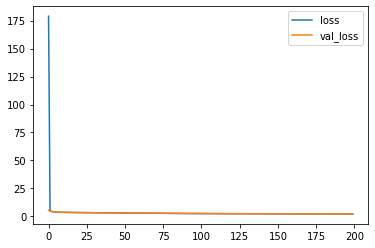

In [16]:
hist[["loss","val_loss"]].plot();

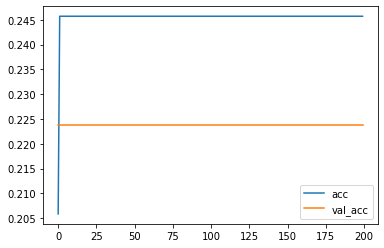

In [17]:
hist[["acc","val_acc"]].plot();

In [18]:
another_model = tf.keras.models.load_model(savemodel_filepath)

In [19]:
another_model

In [20]:
loss, accuracy_of_model = model.evaluate(validation_generator)
print('Accuracy on test dataset:', accuracy_of_model)

NameError: name 'model' is not defined

In [77]:
path = "/Users/guduguntlalaxmiprasad/Desktop/DLFinalProject/UDSculptureDS/TRAIN/MOSES_MAIMONIDES/0.jpg"

img=image.load_img(path, target_size=(124, 124))

ar=image.img_to_array(img)

ar=np.expand_dims(ar, axis=0)

images = np.vstack([ar])

classes = model.predict(images, batch_size=10)
    


In [78]:
predicted_class_indices= np.argmax(classes,axis=1)
labels = (train_generator.class_indices)
labels = dict((x,y) for y,x in labels.items())
predictions = [labels[y] for y in predicted_class_indices]
print("Input Sculpture to model is moses maimonides ")
print(f"Model predicted bird name : {predictions}")

Input Sculpture to model is moses maimonides 
Model predicted bird name : ['HAIL MARY']


In [ ]:
another_model.save("savedmodel")
os.system("python -m tf2onnx.convert --saved-model savedmodel --output model.onnx --opset 13")

In [ ]:
# 
conv2dmodel = tf.keras.models.Sequential([

 tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(124,124,3)),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
    
    
 tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
    
    
 tf.keras.layers.Conv2D(filters = 128,kernel_size =  (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
    
    
 tf.keras.layers.Conv2D(filters = 256,kernel_size =  (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
    
 tf.keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    
    
 tf.keras.layers.MaxPooling2D(2,2),
 
 tf.keras.layers.Conv2D(filters = 1024, kernel_size=(3,3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    
 tf.keras.layers.MaxPooling2D(2,2),         

 tf.keras.layers.Flatten(),
    
    
 tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),

     
 tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),
    
     
 tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),
    
     
 tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),
    
 tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),   
    
 tf.keras.layers.Dense(11, activation='softmax')
])